# Physics 404/604

## Computational Physics (Spring 2020)

## BPB-250

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |









# 1. Programing Style: Efficient Algorithm


## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust  
* Try to use efficient algorithm




## 1.2 Efficient ways to calculate Fibonacci numbers

Fibonacci number
The number series: 1, 1, 2, 3, 5, 8, 13, 21, 34, …
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?



**Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.**
it stores the results of subproblems to avoid repeat computation and takes too long

Identify how we can break problems up, think about what things will be used again to avoid repeat.

## 1.3.1 Recursion method:

Recursion in computer science is a method of solving a problem where the solution depends on solutions to smaller instances of the same problem.

Most computer programming languages support recursion by allowing a function to call itself from within its own code. 

Problem depends on it's solution.


In [1]:
# Recursion
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)
#now when we call this function it will call itself to return 
#answer. it will automatically loop for you

In [2]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 32.05286717414856 seconds ---


## Flow Chart to calculate Fn efficiently



## 1.3.2 Memoization method (Top down):

an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again.

turning [the results of] a function into something to be remembered

In [8]:
# if we have defined an array table = [None]*(n+1)

def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1,table)+fib3(n-2,table) # try this:  please finish this line using recursive method
        #now we are providing a table to store the number to
        #retrieve the value
    return table[n]

In [9]:
import time
n=10
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# try this: Please calculate time if n=40, 1400, 14000

n=40
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))


n=1400
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))


n=14000
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# In programming, the call stack is a buffer that stores requests that need to be handled.

'''
we are still using a recursive method so when we get to 1400
it is still too many
'''

55
--- 0.0002257823944091797 seconds ---
102334155
--- 7.200241088867188e-05 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0008165836334228516 seconds ---


RecursionError: maximum recursion depth exceeded in comparison

## 1.3.2  Tabulation Method (bottom-up)
Calculate all the values from small to big

In [40]:
# calculate numbers one by one from table[2] to table[n]
import numpy as np
def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
    for i in np.arange(2,n+1):
        table[i] = table[i-1]+table[i-2]
   
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    
        
    return table[n]

In [41]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(1400))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(14000)) 
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.00015592575073242188 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0011827945709228516 seconds ---
3002468761178461090995494179715025648692747937490792943468375429502230242942284835863402333575216217865811638730389352239181342307756720414619391217798542575996541081060501905302157019002614964717310808809478675602711440361241500732699145834377856326394037071666274321657305320804055307021019793251762830816701587386994888032362232198219843549865275880699612359275125243457132496772854886508703396643365042454333009802006384286859581649296390803003232654898464561589234445139863242606285711591746222880807391057211912655818499798720987302540712067959840802106849776547522247429904618357394771725653253559346195282601285

## 1.3.3 Using Matrix Algebra (Optional)

$$\left[\begin{array}
{rr}
1 & 1 \\
1 & 0 \\
\end{array}\right]^n=\left[\begin{array}
{rr}
F(n+1) & F(n) \\
F(n) & F(n-1) \\
\end{array}\right]
$$

To calculate F(100), need $A^{100}$ -> $(A^{50})^2$->$A^{25}$->$A^{12}$->$A^6$->$A^3$->$A^1$

In [42]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f
    



In [43]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(14000)) # 93 overflow
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.00012493133544921875 seconds ---
300246876117846109099549417971502564869274793749079294346837542950223024294228483586340233357521621786581163873038935223918134230775672041461939121779854257599654108106050190530215701900261496471731080880947867560271144036124150073269914583437785632639403707166627432165730532080405530702101979325176283081670158738699488803236223219821984354986527588069961235927512524345713249677285488650870339664336504245433300980200638428685958164929639080300323265489846456158923444513986324260628571159174622288080739105721191265581849979872098730254071206795984080210684977654752224742990461835739477172565325355934619528260128501916936020735517922381485710640528500799754769254637875706299958165786718842099577065056552137787433308596312344425895305275146120697761507951143586287967843908117553626557697710686507409951289723510053824119644581556829137784665635297922809891156667595652564418264560817860383717222783889672542560571994230003765052623148688106603

# 2. the complexity of the algorithms

Algorithm complexity is a measure which evaluates the order of the count of operations, performed by a given or algorithm as a function of the size of the input data. To put this simpler, complexity is a rough approximation of the number of steps necessary to execute an algorithm. When we evaluate complexity we speak of order of operation count, not of their exact count. 

For example if we have an order of $N^2$ operations to process N elements, then $N^2$/2 and 3*$N^2$ are of one and the same quadratic order.

Algorithm complexity is commonly represented with the O(f) notation e.g. O($N^2$)

In [44]:
import numpy as np
n2=np.arange(1,41,3)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])


1 8.821487426757812e-06
4 1.0967254638671875e-05
7 2.5272369384765625e-05
10 0.00011348724365234375
13 0.0004088878631591797
16 0.001813650131225586
19 0.011194467544555664
22 0.03598928451538086
25 0.1307523250579834
28 0.5453815460205078
31 2.399730682373047
34 11.51410722732544
37 54.18064284324646


KeyboardInterrupt: 

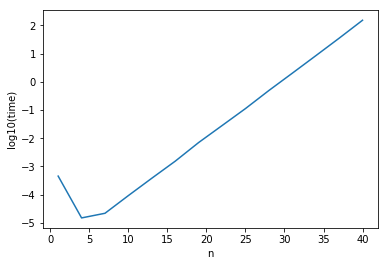

In [16]:
import matplotlib.pyplot as plt
import math
plt.plot(n2,np.log10(time2))
plt.xlabel('n')
plt.ylabel('log10(time)')
plt.show()

In [45]:
# try this: following the above example to calculate the time if n=n2[0], n2[1]...., and make a plot for log10(time) vs n
# for fib4

n2=np.arange(100,100000,100)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib4(n2[i]) #change to fib4
    time2[i] = time.time()-start_time
    '''
    go thru all the elements and store the 
    n time in the array
    '''
    print(n2[i],time2[i])



100 8.034706115722656e-05
200 0.00011372566223144531
300 0.00021409988403320312
400 0.00025653839111328125
500 0.00027871131896972656
600 0.00033926963806152344
700 0.0005588531494140625
800 0.00044727325439453125
900 0.0005185604095458984
1000 0.0005588531494140625
1100 0.0006091594696044922
1200 0.0006794929504394531
1300 0.0009567737579345703
1400 0.0009832382202148438
1500 0.0011758804321289062
1600 0.00124359130859375
1700 0.0010883808135986328
1800 0.001093149185180664
1900 0.0012481212615966797
2000 0.0013256072998046875
2100 0.0012989044189453125
2200 0.001277923583984375
2300 0.0014977455139160156
2400 0.001409769058227539
2500 0.0016589164733886719
2600 0.0018486976623535156
2700 0.002459287643432617
2800 0.001905202865600586
2900 0.0018811225891113281
3000 0.002077817916870117
3100 0.003020763397216797
3200 0.0027103424072265625
3300 0.0024123191833496094
3400 0.002414703369140625
3500 0.002393484115600586
3600 0.0023894309997558594
3700 0.0025386810302734375
3800 0.00316715

31500 0.032976388931274414
31600 0.03804588317871094
31700 0.032242536544799805
31800 0.03095841407775879
31900 0.031047821044921875
32000 0.03209829330444336
32100 0.032911062240600586
32200 0.032518625259399414
32300 0.03307080268859863
32400 0.03202939033508301
32500 0.03133106231689453
32600 0.033046722412109375
32700 0.03182673454284668
32800 0.03567767143249512
32900 0.041106462478637695
33000 0.03345084190368652
33100 0.031203746795654297
33200 0.03308224678039551
33300 0.03247857093811035
33400 0.03226017951965332
33500 0.033049583435058594
33600 0.0334315299987793
33700 0.03429126739501953
33800 0.0335390567779541
33900 0.03358292579650879
34000 0.033380985260009766
34100 0.03283858299255371
34200 0.034143686294555664
34300 0.035550832748413086
34400 0.03675365447998047
34500 0.03964805603027344
34600 0.03495216369628906
34700 0.035700321197509766
34800 0.03573203086853027
34900 0.03643965721130371
35000 0.04653191566467285
35100 0.03501629829406738
35200 0.03499555587768555
3

63100 0.10975837707519531
63200 0.1168203353881836
63300 0.10880661010742188
63400 0.11455082893371582
63500 0.11186051368713379
63600 0.10976290702819824
63700 0.11673569679260254
63800 0.09900903701782227
63900 0.10078740119934082
64000 0.10795283317565918
64100 0.09447240829467773
64200 0.09525370597839355
64300 0.10311365127563477
64400 0.11640691757202148
64500 0.11268234252929688
64600 0.10362386703491211
64700 0.10330605506896973
64800 0.10537481307983398
64900 0.10473299026489258
65000 0.10650229454040527
65100 0.10411405563354492
65200 0.11317920684814453
65300 0.09782528877258301
65400 0.10315704345703125
65500 0.09857797622680664
65600 0.09847593307495117
65700 0.10252261161804199
65800 0.10052323341369629
65900 0.13614177703857422
66000 0.12987446784973145
66100 0.12282657623291016
66200 0.09866046905517578
66300 0.11282229423522949
66400 0.10875535011291504
66500 0.10949587821960449
66600 0.11155247688293457
66700 0.10710501670837402
66800 0.10580182075500488
66900 0.10244

95100 0.20417547225952148
95200 0.19640707969665527
95300 0.21240830421447754
95400 0.20509099960327148
95500 0.19742083549499512
95600 0.1969585418701172
95700 0.20173239707946777
95800 0.20195746421813965
95900 0.20489740371704102
96000 0.20195508003234863
96100 0.18975830078125
96200 0.22835993766784668
96300 0.19730091094970703
96400 0.20257854461669922
96500 0.22472810745239258
96600 0.22011518478393555
96700 0.20219111442565918
96800 0.20560073852539062
96900 0.20683813095092773
97000 0.21715545654296875
97100 0.21996426582336426
97200 0.21552228927612305
97300 0.22854018211364746
97400 0.21836280822753906
97500 0.19762253761291504
97600 0.20137715339660645
97700 0.20214295387268066
97800 0.22253179550170898
97900 0.2004227638244629
98000 0.19639039039611816
98100 0.21143388748168945
98200 0.19339203834533691
98300 0.20817804336547852
98400 0.20304131507873535
98500 0.21010398864746094
98600 0.23514342308044434
98700 0.20141005516052246
98800 0.20452117919921875
98900 0.220305919

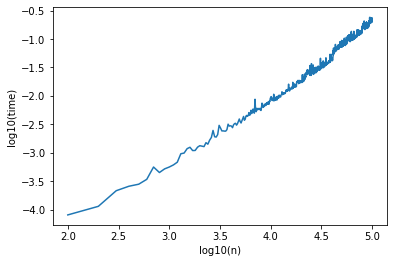

In [46]:
import matplotlib.pyplot as plt
import math
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()

In [47]:
# matrix method
n2=np.arange(1000,1000000,1000)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib5(n2[i])
    time2[i] = time.time()-start_time


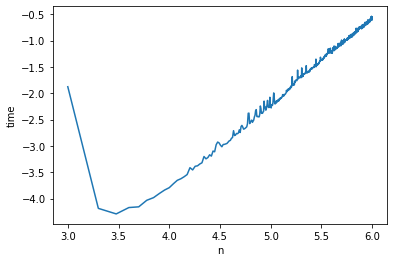

In [48]:
import matplotlib.pyplot as plt
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('n')
plt.ylabel('time')
plt.show()

We learned that Dynamic Programming is like Divide-and-conquer.

Memorization:
computes only what it needs, not every value.

and Tabulation:
bottom up and uses a matrix 

These are the ideal methods of this.

How to do this:

*try the problem first w/o dynamic programming
*figure out if there are larger problems
*pay attention to any repetition function calls